In [1]:
from lab1.lab1 import evaluate as lab1_evaluate
from lab2.lab2 import evaluate as lab2_evaluate
from lab1.lab1 import random_solution, nearest_neighbor
from lab2.lab2 import greedy_cycle as greedy_cycle
from lab3.lab3 import local_search_greedy, local_search_steepest
from lab3.lab3 import evaluate as lab3_evaluate

import numpy as np

In [2]:
tsp_c = np.loadtxt('lab3/TSPC.csv', dtype=int, delimiter=';')
tsp_d = np.loadtxt('lab3/TSPD.csv', dtype=int, delimiter=';')

In [3]:
scores_file = open("scores.csv","w")
times_file = open("times.csv","w")
scores_file.write('methods;TSP_C;TSP_D\n')
times_file.write('methods;TSP_C;TSP_D\n')

20

In [4]:
results_c = lab1_evaluate(random_solution,tsp_c)
results_d = lab1_evaluate(random_solution,tsp_d)

scores_file.write(f'random solution; {results_c["average_score"]} ({results_c["worst_score"]} - {results_c["best_score"]}); {results_d["average_score"]} ({results_d["worst_score"]} - {results_d["best_score"]})\n')

times_file.write(f'random solution; {round(results_c["average_time"],4)} ({round(results_c["worst_time"],4)} - {round(results_c["best_time"],4)}); {round(results_d["average_time"],4)} ({round(results_d["worst_time"],4)} - {round(results_d["best_time"],4)})\n')

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

67

In [5]:
results_c = lab1_evaluate(nearest_neighbor,tsp_c)
results_d = lab1_evaluate(nearest_neighbor,tsp_d)

scores_file.write(f'nearest neighbor; {results_c["average_score"]} ({results_c["worst_score"]} - {results_c["best_score"]}); {results_d["average_score"]} ({results_d["worst_score"]} - {results_d["best_score"]})\n')

times_file.write(f'nearest neighbor; {round(results_c["average_time"],4)} ({round(results_c["worst_time"],4)} - {round(results_c["best_time"],4)}); {round(results_d["average_time"],4)} ({round(results_d["worst_time"],4)} - {round(results_d["best_time"],4)})\n')

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

67

In [6]:
results_c = lab1_evaluate(greedy_cycle,tsp_c)
results_d = lab1_evaluate(greedy_cycle,tsp_d)

scores_file.write(f'greedy cycle; {results_c["average_score"]} ({results_c["worst_score"]} - {results_c["best_score"]}); {results_d["average_score"]} ({results_d["worst_score"]} - {results_d["best_score"]})\n')

times_file.write(f'greedy cycle; {round(results_c["average_time"],4)} ({round(results_c["worst_time"],4)} - {round(results_c["best_time"],4)}); {round(results_d["average_time"],4)} ({round(results_d["worst_time"],4)} - {round(results_d["best_time"],4)})\n')

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

62

In [7]:
results_c = lab2_evaluate(greedy_cycle,tsp_c,weight=0.5)
results_d = lab2_evaluate(greedy_cycle,tsp_d,weight=0.5)

scores_file.write(f'greedy cycle with regret; {results_c["average_score"]} ({results_c["worst_score"]} - {results_c["best_score"]}); {results_d["average_score"]} ({results_d["worst_score"]} - {results_d["best_score"]})\n')

times_file.write(f'greedy cycle with regret; {round(results_c["average_time"],4)} ; {round(results_d["average_time"],4)} \n')

43

In [22]:
order_c = []
for i in results_c["path"]:
    if i not in order_c:
        order_c.append(i)

In [23]:
order_d = []
for i in results_d["path"]:
    if i not in order_d:
        order_d.append(i)

In [8]:
greedy_c = lab3_evaluate(local_search_greedy,tsp_c)
greedy_d = lab3_evaluate(local_search_greedy,tsp_d)

scores_file.write(f'local search greedy; {greedy_c["average_score"]} ({greedy_c["worst_score"]} - {greedy_c["best_score"]}); {greedy_c["average_score"]} ({greedy_c["worst_score"]} - {greedy_c["best_score"]})\n')

times_file.write(f'local search greedy; {round(greedy_d["average_time"],4)}; {round(greedy_d["average_time"],4)}\n')

34

In [26]:
import matplotlib.pyplot as plt
def summarize(evaluation_results, data, title):
    (x, y, z) = evaluation_results["solution"]
    print(f"{title}:")

    print(
        f'average score: {evaluation_results["average_score"]}\tworst score: {evaluation_results["worst_score"]}\tbest score: {evaluation_results["best_score"]}'
    )
    print("Best solution:")

    plt.figure(figsize=(15, 10))
    plt.scatter(data[:, 0], data[:, 1], np.full(data[:, 0].size, 100), data[:, 2], cmap="gray_r")
    plt.clim(0, 2000)
    plt.colorbar().set_label("cost", labelpad=-45, y=1.025, rotation=0)
    plt.plot(x, y, "r")
    plt.xlim([-100, 4100])
    plt.ylim([-100, 2100])
    plt.title(title)
    plt.show()

Local search greedy TSP C:
average score: 52249.58	worst score: 55310.0	best score: 50128.0
Best solution:


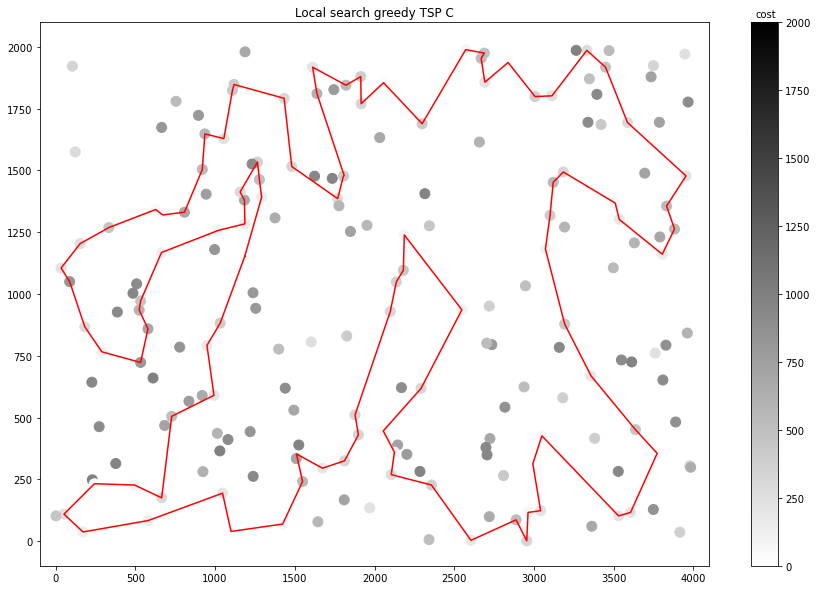

In [28]:
summarize(greedy_c,tsp_c,"Local search greedy TSP C")

Local search greedy TSP D:
average score: 49341.085	worst score: 52077.0	best score: 46751.0
Best solution:


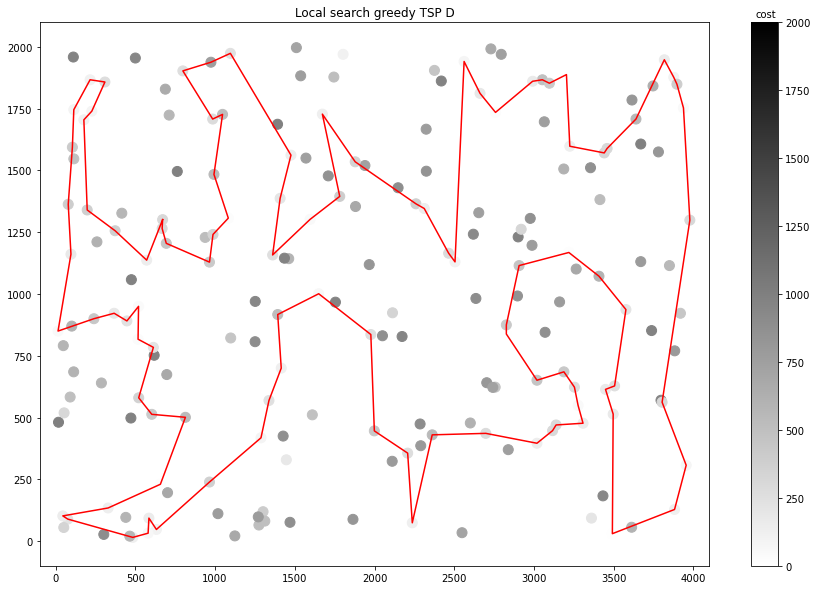

In [29]:
summarize(greedy_d,tsp_d,"Local search greedy TSP D")

In [9]:
steepest_c = lab3_evaluate(local_search_steepest,tsp_c)
steepest_d = lab3_evaluate(local_search_steepest,tsp_d)

scores_file.write(f'local search steepest; {steepest_c["average_score"]} ({steepest_c["worst_score"]} - {steepest_c["best_score"]}); {steepest_c["average_score"]} ({steepest_c["worst_score"]} - {steepest_c["best_score"]})\n')

times_file.write(f'local search steepest; {round(steepest_c["average_time"],4)}; {round(steepest_d["average_time"],4)}\n')

38

Local search steepest TSP C:
average score: 51987.215	worst score: 54611.0	best score: 49596.0
Best solution:


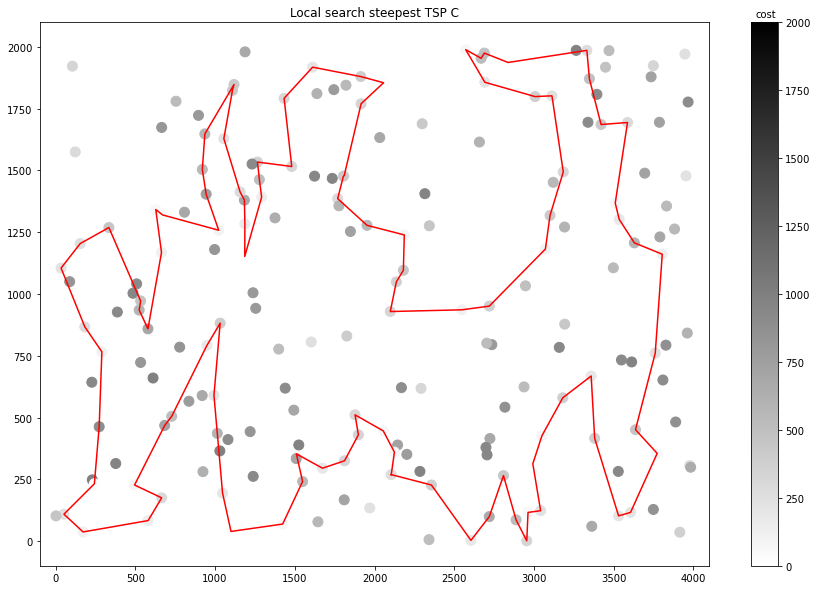

In [30]:
summarize(steepest_c,tsp_c,"Local search steepest TSP C")

Local search steepest TSP D:
average score: 48821.07	worst score: 52624.0	best score: 45509.0
Best solution:


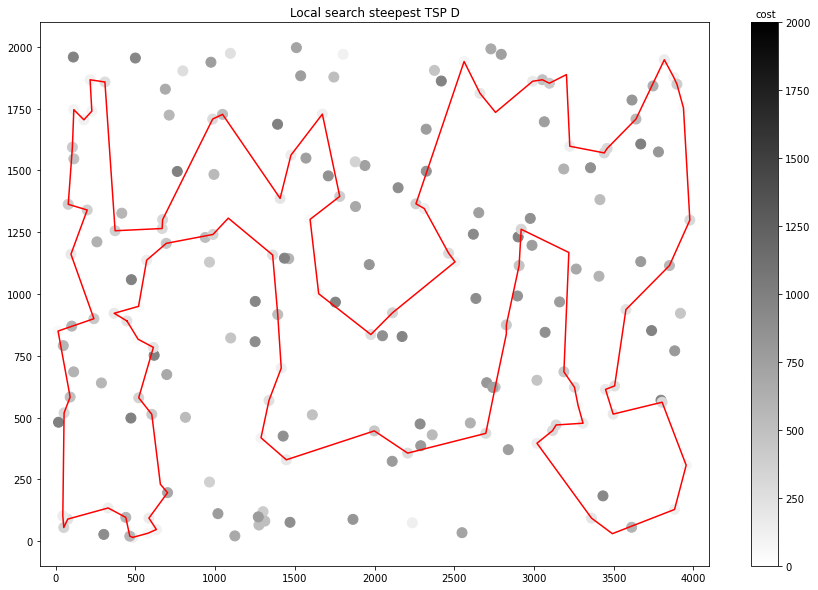

In [31]:
summarize(steepest_d,tsp_d,"Local search steepest TSP D")

In [10]:
scores_file.close()
times_file.close()

In [15]:
from lab3.lab3 import create_neighborhood, calculate_value, calculate_cost
from multiprocessing import Pool
from time import time
import random

In [14]:
def local_search_steepest(data, distances,order):
    best_score = 1
    while best_score:
        neighborhood = create_neighborhood(order, len(data))
        best_move = None
        best_score = 0
        for move in random.sample(neighborhood,len(neighborhood)):
            if move[0] == 0:
                a = order[move[1] - 1]
                b = order[(move[1] + 1) % len(order)]
                old = distances[a][order[move[1]]] + distances[order[move[1]]][b]
                new = distances[a][move[2]] + distances[move[2]][b]
                if old - new > best_score:
                    best_score = old - new
                    best_move = move
            elif move[0] == 1:
                a = order[(move[1] - 1) % len(order)] # move[1]
                b = order[(move[1] + 1) % len(order)]
                c = order[(move[2] - 1) % len(order)] # move[2]
                d = order[(move[2] + 1) % len(order)]
                old = distances[a][order[move[1]]] + distances[order[move[1]]][b] + distances[c][order[move[2]]] + distances[order[move[2]]][d]

                new_order = order.copy()
                new_order[move[1]], new_order[move[2]] = new_order[move[2]], new_order[move[1]]
                a = new_order[(move[1] - 1) % len(new_order)] # move[1]
                b = new_order[(move[1] + 1) % len(new_order)]
                c = new_order[(move[2] - 1) % len(new_order)] # move[2]
                d = new_order[(move[2] + 1) % len(new_order)]
                new = distances[c][order[move[1]]] + distances[order[move[1]]][d] + distances[a][order[move[2]]] + distances[order[move[2]]][b]

                if old - new > best_score:
                    best_score = old - new
                    best_move = move
            else:
                old = distances[order[move[1]-1]][order[move[1]]] + distances[order[move[2]-1]][order[move[2]]]
                new = distances[order[move[1]-1]][order[move[2]-1]] + distances[order[move[1]]][order[move[2]]]
                if old - new > best_score:
                    best_score = old - new
                    best_move = move
        if best_move is not None:
            if best_move[0] == 0:
                order[best_move[1]] = best_move[2]
            elif best_move[0] == 1:
                order[best_move[1]], order[best_move[2]] = order[best_move[2]], order[best_move[1]]
            else:
                ind = sorted([best_move[1], best_move[2]])
                if ind[0] == 0:
                    order = order[ind[1]-1::-1] + order[ind[1]:]
                else:
                    order = order[:ind[0]] + order[ind[1]-1:ind[0]-1:-1] + order[ind[1]:]

    return calculate_value(data, distances, order)

In [ ]:
def evaluate(func, data, n=200, order):
    distances = calculate_cost(data)
    total, worst_value, best_value, best_solution = 0, 0, float("inf"), None
    iterable = []
    for i in range(n):
        iterable.append([data,distances,i,order])
    pool = Pool()
    results = pool.starmap_async(func,iterable)
    start = time()
    for result in results.get():
        value, solution = result
        total += value
        if value < best_value:
            best_solution = solution
            best_value = value
        worst_value = max(worst_value, value)
    total_time = time() - start

    return dict(
        average_score=total / n,
        worst_score=worst_value,
        best_score=best_value,
        solution=np.array(best_solution).T,
        average_time=total_time / n,
    )

In [ ]:
greedy_c = lab3_evaluate(local_search_greedy,tsp_c,order)
greedy_d = lab3_evaluate(local_search_greedy,tsp_d,order)

scores_file.write(f'local search greedy; {greedy_c["average_score"]} ({greedy_c["worst_score"]} - {greedy_c["best_score"]}); {greedy_c["average_score"]} ({greedy_c["worst_score"]} - {greedy_c["best_score"]})\n')

times_file.write(f'local search greedy; {round(greedy_d["average_time"],4)}; {round(greedy_d["average_time"],4)}\n')